# Get heights from Urabn Atlas 2012 data
Link --> https://land.copernicus.eu/local/urban-atlas/building-height-2012?tab=metadata

### Read the tif file

In [1]:
import rasterio
dataset = rasterio.open(r'Urban-2012.tif')

In [2]:
dataset.meta

{'driver': 'GTiff',
 'dtype': 'uint16',
 'nodata': 65535.0,
 'width': 1575,
 'height': 1466,
 'count': 1,
 'crs': CRS.from_epsg(3035),
 'transform': Affine(10.0, 0.0, 4450260.0,
        0.0, -10.0, 3160400.0)}

In [3]:
dataset.statistics(True)

Statistics(min=3.0, max=77.0, mean=8.511006669661679, std=5.952973268973862)

In [4]:
heights = dataset.read()[0]

### Create a data frame (cordinates, height)

In [6]:
import pandas as pd
import numpy as np
import time

start_time = time.time()
X_c = []
Y_c = []
Height_values = []
df = pd.DataFrame()

for i in range(heights.shape[0]):
    for j in range(heights.shape[1]):
        Height_values.append(heights[i][j]) 
        X_c.append(dataset.xy(i, j)[0])
        Y_c.append(dataset.xy(i, j)[1])
df["X_c"] = X_c
df["Y_c"] = Y_c
df["Height"] = Height_values
print("--- %s seconds ---" % (time.time() - start_time))

--- 3476.887298107147 seconds ---


### Convert data frame to Geopandas

In [12]:
import geopandas as gp
gdf = gp.GeoDataFrame(df, geometry=gp.points_from_xy(df.X_c, df.Y_c))

### Replace value 65535 with NaN + Plot GeoData

In [19]:
gdf = gdf.replace({65535: np.nan})

<AxesSubplot: >

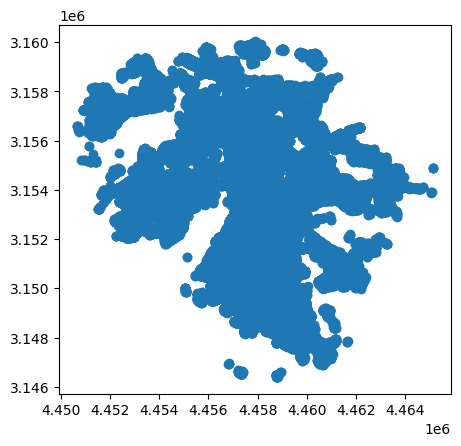

In [21]:
gdf[~gdf['Height'].isna()].plot()

### Set crs for the Geopandas data frame (same as tif data)

In [25]:
gdf = gdf.set_crs('3035')

### Update columns

In [27]:
gdf = gdf[["Height","geometry"]]

In [28]:
gdf.head()

,Height,geometry
0,NaN,POINT (4450265.000 3160395.000)
1,NaN,POINT (4450275.000 3160395.000)
2,NaN,POINT (4450285.000 3160395.000)
3,NaN,POINT (4450295.000 3160395.000)
4,NaN,POINT (4450305.000 3160395.000)


### Save the Geopandas data into GeoJson File 

In [29]:
gdf.to_file('Urban_Atlas_2012.geojson', driver='GeoJSON')  

### Save the Geopandas data into GeoJson File (only available values)

In [33]:
subData = gdf[~gdf['Height'].isna()].reset_index()
subData.to_file('Urban_Atlas_2012_sub.geojson', driver='GeoJSON')  